<a href="https://colab.research.google.com/github/vivek201102/ML-Labs/blob/master/Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing some required libraries

import pandas as pd

In [ ]:
# Loading data
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/Datasets/tweeter.csv", encoding="latin", names=columns)
print(df.describe())

df["sentiment"] = df["sentiment"].replace(4,1)

In [ ]:
# Analyze data
# Count the number of possitive and negative tweets
import seaborn as sns

sns.countplot(x = "sentiment", data = df)

In [ ]:
# Analyze possitve tweet text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_tweet = df[df["sentiment"] == 1]['text'].tolist()
positive_string = " ".join(positive_tweet)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_string))



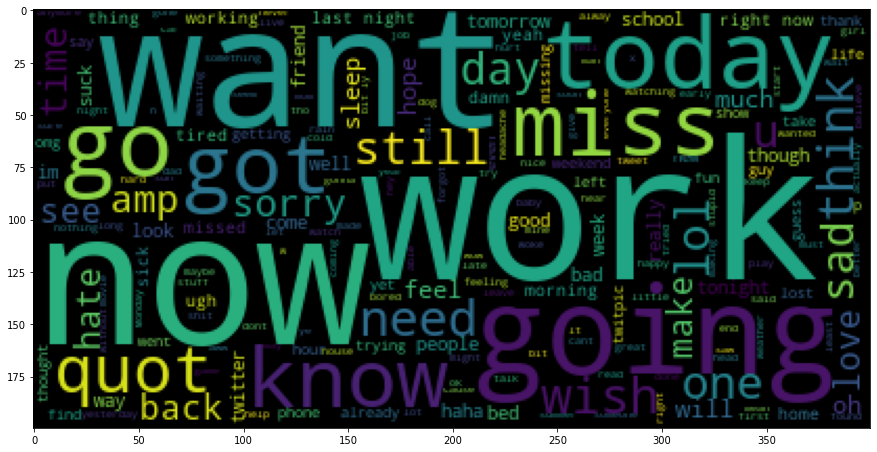

In [ ]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_string))

In [ ]:
import re

positive_string = re.sub(r'https?:\/\/.*[\r\n]*', '', positive_string)
positive_string = re.sub(r'#', '', positive_string)

positive_string

"I LOVE @Health4UandPets u guys r the best!!  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!! @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup @LovesBrooklyn2 he has that effect on everyone  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk! @r_keith_hill Thans for your response. Ihad already find this answer  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!  @tommcfly ah, congrats mr fletcher for finally joining twitter  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors  crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told me too! ha. happy birthday JB!  @naughtyha

In [ ]:
# Download first time only
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize.sonority_sequencing import punctuation
# Preprocessing

# Remove stopwords(I, me myself, our,...)
# Remove urls


from nltk.corpus import stopwords
import string
from nltk.tokenize import TweetTokenizer

# stopword of english
stopwords_english = stopwords.words("english")

# Removing stopword

stopwords_english = stopwords.words('english')
positive_tweets_clean=[]

#Tokenize the string
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)
# tokenize tweets
positive_tweet_tokens = tokenizer.tokenize(positive_string)

for word in positive_tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation) :
      positive_tweets_clean.append(word)


positive_tweets_clean


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# step - 5 Data Preprocessing
import string

data = df[['text', 'sentiment']]


# Positive & Negative separating
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]


# print(data_pos)
# print(data_neg)

# Text to lower case
dataset = pd.concat([data_pos, data_neg])
dataset['text'] = dataset['text'].str.lower()

# Stopwords
stopwords_english = stopwords.words("english")

def cleaning_text(text):
  return " ".join([word for word in str(text).split() if word not in stopwords_english])

dataset['text'] = dataset['text'].apply(lambda text : cleaning_text(text))



# Nothing to replace so x = '' and y = '' and z = punctuation (z should be removed)
def cleaning_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

dataset['text'] = dataset['text'].apply(lambda text : cleaning_punctuation(text))

dataset['text'] = dataset['text'].apply(lambda text : re.sub('((www.[^s]+)|(https?://[^s]+))',' ', text))

dataset['text']




800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
                                ...                        
799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads much...
799999    resit exams summer wishes worked harder first ...
Name: text, Length: 1600000, dtype: object

In [ ]:
# Tokenize
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False)
dataset['text'] = dataset['text'].apply(lambda x: tokenizer.tokenize(x))



In [ ]:
# Stemming

import nltk

st = nltk.PorterStemmer()

def stemming(data):
  text = [st.stem(word) for word in data]
  return data

dataset['text'] = dataset['text'].apply(lambda x: stemming(x))

dataset

,text,sentiment
800000,"[love, health, 4uandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, 2, effect, everyone]",1
...,...,...
799995,"[sick, spending, day, laying, bed, listening, ...",0
799996,"[gmail, down]",0
799997,"[rest, peace, farrah, sad]",0
799998,"[ericurbane, sounds, like, rival, flagging, ad...",0


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset

,text,sentiment
800000,"[love, health, 4uandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, 2, effect, everyone]",1
...,...,...
799995,"[sick, spending, day, laying, bed, listening, ...",0
799996,"[gmail, down]",0
799997,"[rest, peace, farrah, sad]",0
799998,"[ericurbane, sounds, like, rival, flagging, ad...",0


In [ ]:
# Count Vectorization

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

def convert_string(s):
  str = ""
  for e in s:
    str+=e
  return str
  
dataset['text'] = dataset['text'].apply(lambda text: convert_string(text))

vectorizer.fit(dataset['text'])

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_.values)


Vocabulary:  <built-in method values of dict object at 0x7ff05a0a2240>
